In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
# convert the txt to dataframe with our delimiters and header as none since we do not have headers in our input file and give them Time and volts are their header.
df = pd.read_csv("guva_output_voltage_4.txt",sep = '\t', header = None, names=['Time','volts'])

In [3]:
df1 = pd.read_csv("temp_4.txt", sep = '->', header = None, names=['Time', 'Temp'])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [4]:
# We have seen that the dataframe has HH:MM:SS.SS format which will need to converted to seconds.
# Here I am defining a function to convert the Time into seconds. 
def time_convert(x):
  h,m,s = x.split(':') # Looks for ':' splits 
  return int(h) * 3600 + int(m) * 60 + float(s) # and returns the conversion to seconds. Note that we are using float(s) as we have SS.SS 

In [5]:
# Apply the function to dataframe column 'Time'.
df['Time'] = df['Time'].apply(time_convert)

In [6]:
# Let's check our Time column
df['Time'] 
# as you can see we got the desired results.

0       54910.951
1       54911.950
2       54912.950
3       54913.949
4       54914.949
          ...    
2141    57054.087
2142    57055.069
2143    57056.085
2144    57057.081
2145    57058.090
Name: Time, Length: 2146, dtype: float64

In [7]:
# let's do the same for dataframe 2
df1['Time'] = df1['Time'].apply(time_convert)


In [8]:
df1['Time']

0       54914.934
1       54916.062
2       54917.233
3       54918.358
4       54919.530
          ...    
1864    57057.315
1865    57058.451
1866    57059.580
1867    57060.757
1868    57061.883
Name: Time, Length: 1869, dtype: float64

In [9]:
#Lets split the volt dataframe as volt column
volt_df = df.volts

In [10]:
df

,Time,volts
0,54910.951,368
1,54911.950,373
2,54912.950,368
3,54913.949,316
4,54914.949,368
...,...,...
2141,57054.087,337
2142,57055.069,343
2143,57056.085,344
2144,57057.081,339


In [11]:
# let's check if we have our volts in our new data frame.
print(volt_df)

0       368
1       373
2       368
3       316
4       368
       ... 
2141    337
2142    343
2143    344
2144    339
2145    347
Name: volts, Length: 2146, dtype: int64


In [12]:
time_df = df.Time 

In [13]:
print(time_df)

0       54910.951
1       54911.950
2       54912.950
3       54913.949
4       54914.949
          ...    
2141    57054.087
2142    57055.069
2143    57056.085
2144    57057.081
2145    57058.090
Name: Time, Length: 2146, dtype: float64


In [14]:
# Let's split the data of Temp to a new data frame. 
temp_df = df1.Temp

In [15]:
print(temp_df)

0       19.55
1       19.75
2       19.67
3       19.78
4       19.81
        ...  
1864    30.93
1865    30.90
1866    31.02
1867    30.93
1868    31.00
Name: Temp, Length: 1869, dtype: float64


In [16]:
# Split the time from dataframe of df1 to new time dataframe 1
time_df1= df1.Time

In [17]:
print(time_df1)

0       54914.934
1       54916.062
2       54917.233
3       54918.358
4       54919.530
          ...    
1864    57057.315
1865    57058.451
1866    57059.580
1867    57060.757
1868    57061.883
Name: Time, Length: 1869, dtype: float64


In [19]:
%matplotlib inline

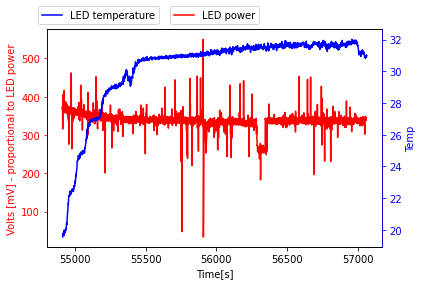

In [57]:
# Let's create a figure.
fig, ax1 = plt.subplots()

curve1 = ax1.plot(time_df, volt_df, label = "LED", color = "red")

# Let's mix the X axis of the data as they have comon X axis that is Time[s]
ax2 = ax1.twinx()
curve2 = ax2.plot(time_df1, temp_df, label ="Volts", color ="blue")

# Let's set the label for our axis with proper color and name.
ax1.set_ylabel("Volts [mV] - proportional to LED power", color ="red")
ax2.set_ylabel("Temp", color ="blue")
ax1.set_xlabel("Time[s]")
# customize
ax1.tick_params(axis ='y', colors = "red")
ax2.tick_params(axis ='y', colors = "blue")
# customize
ax2.spines["right"].set_color("blue")
ax1.spines["left"].set_color("red")

# get legends for both axis
# Let's plot the legend outside 
# plt.legend(bbox_to_anchor=(0, 1), loc='location', ncol=1)
ax1.legend(['LED power'],bbox_to_anchor=(0.5, 1), loc="lower center")
ax2.legend(['LED temperature'],bbox_to_anchor=(0.35, 1), loc="lower right")

# Let's save the image before plt.show()
plt.savefig('Ledpower_Ledtemp.jpeg', dpi=300, bbox_inches='tight')


plt.show()

